In [1]:
from archappl.client import ArchiverDataClient
from phantasy import MachinePortal
from datetime import datetime
%matplotlib notebook

In [3]:
mp = MachinePortal("FRIB", "MEBT_FS1A")
bpms = mp.get_elements(type="BPM")
client = ArchiverDataClient()
client.url = "http://epicsarchiver0.ftc:17668"

[09:30:03.426] INFO: phantasy.library.operation.core: Load new machine: 'FRIB', segment: 'MEBT_FS1A'
[09:30:03.427] INFO: phantasy.library.parser.config: Importing FRIB from /user/zhangt/test_phantasy/phantasy-machines/FRIB
[09:30:03.429] INFO: phantasy.library.parser.config: Loading machine configuration from /user/zhangt/test_phantasy/phantasy-machines/FRIB/phantasy.ini
[09:30:03.430] INFO: phantasy.library.operation.lattice: Loading segment: 'MEBT_FS1A'
[09:30:03.519] INFO: phantasy.library.operation.lattice: UNICORN policy will be loaded from /user/zhangt/test_phantasy/phantasy-machines/unicorn/unicorn-data.xlsx.
[09:30:03.521] INFO: phantasy.library.operation.lattice: Device polarity data is loaded from /user/zhangt/test_phantasy/phantasy-machines/polarity/polarity_data.csv.
[09:30:03.526] INFO: phantasy.library.operation.lattice: Loading PV data from CSV/SQLite: /user/zhangt/test_phantasy/phantasy-machines/FRIB/linac/all_channels.csv
[09:30:03.527] INFO: phantasy.library.pv.datas

In [4]:
pvs_x = [i.pv('X', handle='readback')[0] for i in bpms]
pvs_y = [i.pv('Y', handle='readback')[0] for i in bpms]

In [5]:
ts0 = "2019-03-05T13:04:08.120000"
dt = datetime.strptime(ts0, "%Y-%m-%dT%H:%M:%S.%f")

In [6]:
ts0_epoch = dt.timestamp()

In [7]:
_ts0 = datetime.fromtimestamp(ts0_epoch).isoformat() + "-05:00"

In [8]:
print(_ts0)

2019-03-05T13:04:08.120000-05:00


In [9]:
r = client.get_data_at_time([pvs_x[0]], ts=_ts0)

In [10]:
r

{'FE_MEBT:BPM_D1056:XPOS_RD': {'severity': 0,
  'val': -0.944449345999152,
  'nanos': 4464964,
  'secs': 1551809048,
  'status': 0}}

In [11]:
client

[Data Client] Archiver Appliance on: http://epicsarchiver0.ftc:17668/retrieval/data/getData.json

In [58]:
data = client.get_data('FE_LEBT:PSC2_D0773:I_CSET',
                       ts_from='2019-03-01T13:04:08.120000-05:00',
                       ts_to='2019-04-01T21:20:08.120000-05:00')

In [59]:
data

,val,severity,status
Timestamp,,,
2019-02-25 14:57:10.800305605-05:00,-3.224,0,0
2019-03-04 17:04:26.088551760-05:00,-2.248,0,0
2019-03-05 10:21:39.984897137-05:00,-2.998,0,0
2019-03-08 09:58:23.502053738-05:00,-3.411,0,0
2019-03-29 11:37:43.629910707-04:00,-2.998,0,0
2019-03-29 16:13:29.555224657-04:00,-2.598,0,0
2019-03-29 16:13:37.049640417-04:00,-2.098,0,0


In [60]:
client.format = 'raw'
data1 = client.get_data('FE_LEBT:PSC2_D0773:I_CSET',
                       ts_from='2019-03-01T13:04:08.120000-05:00',
                       ts_to='2019-04-01T21:20:08.120000-05:00')

TypeError: string indices must be integers

In [61]:
client

[Data Client] Archiver Appliance on: http://epicsarchiver0.ftc:17668/retrieval/data/getData.raw

In [19]:
data.index

DatetimeIndex(['2019-02-25 14:57:10.800305605-05:00',
               '2019-03-04 17:04:26.088551760-05:00',
               '2019-03-05 10:21:39.984897137-05:00',
               '2019-03-08 09:58:23.502053738-05:00',
               '2019-03-29 11:37:43.629910707-04:00',
               '2019-03-29 16:13:29.555224657-04:00',
               '2019-03-29 16:13:37.049640417-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)

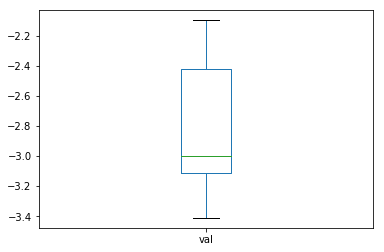

In [23]:
data.plot(y='val', kind='box')

In [62]:
client.get_data_at_time(['FE_LEBT:PSC2_D0773:I_CSET'], ts='2019-03-08T09:58:23.502054-05:00')

{}

In [63]:
client.get_data_at_time(['FE_LEBT:PSC2_D0773:I_CSET'], ts='2019-03-08T09:58:23.502054-05:00')

{}

In [25]:
from archappl.client import ArchiverMgmtClient

In [26]:
admin_client = ArchiverMgmtClient()
admin_client.url = "http://epicsarchiver0.ftc:17665"

In [27]:
admin_client

[Admin Client] Archiver Appliance on: http://epicsarchiver0.ftc:17665/mgmt/bpl

# TS range

In [28]:
from archappl.data import iso_to_epoch, epoch_to_iso

In [29]:
ts0_iso = "2019-03-05T15:30:00.000001-05:00"
ts0_epoch, tz = iso_to_epoch(ts0_iso)

In [31]:
ts0_epoch, tz

(1551817800.000001, '-05:00')

In [32]:
delt_sec = 300
t0 = ts0_epoch - delt_sec
t1 = ts0_epoch + delt_sec
ts_begin = epoch_to_iso(t0)
ts_end = epoch_to_iso(t1)
print(ts_begin, ts_end)

2019-03-05T15:25:00.000001-05:00 2019-03-05T15:35:00.000001-05:00


In [33]:
import numpy as np

In [34]:
pv_list = pvs_x[0::1]
n_ts = 300
n_elem = len(pv_list)
ts_list = [epoch_to_iso(i, tz) for i in np.linspace(t0, t1, n_ts)]
m = []
#m = np.zeros([n_ts, n_elem])

In [53]:
r0 = client.get_data_at_time(pv_list[0:1], ts=ts_list[0])

In [51]:
r0

{}

In [40]:
ts_list[0], pv_list[0:1]

('2019-03-05T15:25:00.000001-05:00', ['FE_MEBT:BPM_D1056:XPOS_RD'])

In [41]:
for i, its in enumerate(ts_list):
    r = client.get_data_at_time(pv_list, ts=its)
    m.append([r[pv]['val'] for pv in pv_list if pv in r])

In [42]:
results = np.array(m)

In [47]:
r1 = client.get_data_at_time(pv_list, ts=its)
r1

{}

In [38]:
valid_pvs = [k for k in pv_list if k in list(r.keys())]

In [39]:
import pickle

In [40]:
data = {'results': results, 'pvs': valid_pvs, 'ts_iso': ts_list, 'ts': np.linspace(t0, t1, n_ts)}

In [41]:
with open('data1.pkl', 'wb') as fp:
    pickle.dump(data, fp)